In [1]:
import SimpleITK as sitk
import numpy as np
from scipy import ndimage
import math
import cv2
import random
import sys
import math
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import nibabel as nib
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from torchvision import datasets, models, transforms
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix

In [2]:
%run utils.ipynb

# Tabular Data

In [3]:
# df_path = "../marksheet.csv"
df_path =  "../data/marksheet.csv"

In [4]:
df = pd.read_csv(df_path)

In [5]:
df.head()

,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,lesion_ISUP,case_ISUP,case_csPCa
0,10000,1000000,2019-07-02,73,7.7,NaN,55.0,MRBx,0+0,0,0,NO
1,10001,1000001,2016-05-27,64,8.7,0.09,102.0,NaN,NaN,NaN,0,NO
2,10002,1000002,2021-04-18,58,4.2,0.06,74.0,NaN,NaN,NaN,0,NO
3,10003,1000003,2019-04-05,72,13.0,NaN,71.5,SysBx,0+0,0,0,NO
4,10004,1000004,2020-10-21,67,8.0,0.10,78.0,SysBx+MRBx,"0+0,0+0","0,0",0,NO


In [6]:
df['patient_age']

0       73
1       64
2       58
3       72
4       67
        ..
1495    71
1496    81
1497    56
1498    71
1499    56
Name: patient_age, Length: 1500, dtype: int64

## Data Missingness

In [7]:
missing_values_count = df['patient_age'].isnull().sum()
print(missing_values_count)

0


## Descriptive Stats for all participants

In [8]:
summary_stats = df['patient_age'].describe()
print(summary_stats)

count    1500.000000
mean       65.595333
std         7.191527
min        35.000000
25%        61.000000
50%        66.000000
75%        70.000000
max        92.000000
Name: patient_age, dtype: float64


## Descriptive Stats for each class

In [9]:
cancer = df[df['case_csPCa'] == 'YES']
no_cancer = df[df['case_csPCa'] == 'NO']

In [10]:
summary_stats_cancer = cancer['patient_age'].describe()
print('------Patients with Cancer -----')
print(summary_stats_cancer)

------Patients with Cancer -----
count    425.000000
mean      67.720000
std        6.898127
min       48.000000
25%       64.000000
50%       68.000000
75%       73.000000
max       87.000000
Name: patient_age, dtype: float64


In [11]:
summary_stats_no_cancer = no_cancer['patient_age'].describe()
print('------Patients without Cancer -----')
print(summary_stats_no_cancer)

------Patients without Cancer -----
count    1075.000000
mean       64.755349
std         7.134819
min        35.000000
25%        60.000000
50%        65.000000
75%        69.000000
max        92.000000
Name: patient_age, dtype: float64


## Plots

/Users/emilia/micromamba/envs/cs109b/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilia/micromamba/envs/cs109b/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


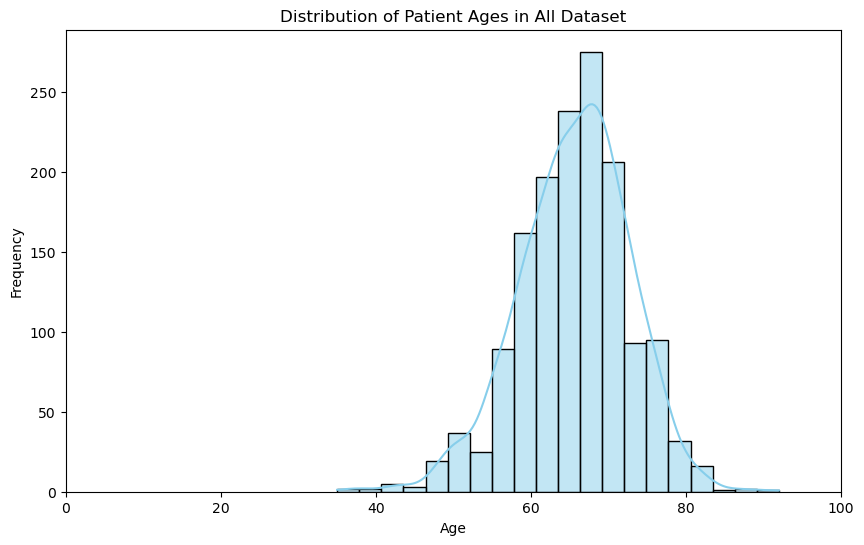

In [17]:
plot_histogram(df['patient_age'], 'Distribution of Patient Ages in All Dataset', 'Age', 'Frequency', x_range=(0, 100))

/Users/emilia/micromamba/envs/cs109b/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilia/micromamba/envs/cs109b/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


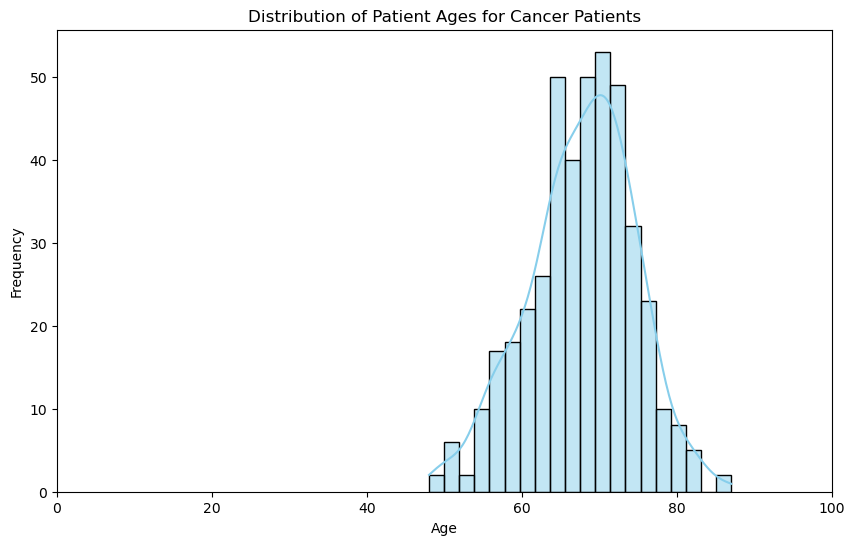

In [16]:
plot_histogram(cancer['patient_age'], 'Distribution of Patient Ages for Cancer Patients', 'Age', 'Frequency', x_range=(0, 100))

/Users/emilia/micromamba/envs/cs109b/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilia/micromamba/envs/cs109b/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


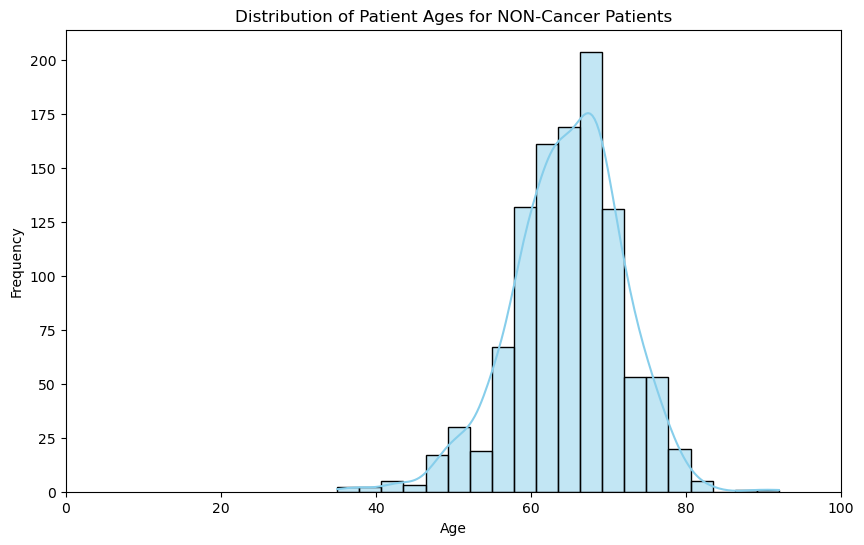

In [15]:
plot_histogram(no_cancer['patient_age'], 'Distribution of Patient Ages for NON-Cancer Patients', 'Age', 'Frequency', x_range=(0, 100))